<a href="https://colab.research.google.com/github/avkornaev/pytorchBasics2023/blob/main/08_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Initialization

In [2]:
bc = datasets.load_breast_cancer()
X, Y = bc.data, bc.target
n_samples, n_features = X.shape
#Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=20, random_state=1234)



In [3]:
#Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32))
Y_test = torch.from_numpy(Y_test.astype(np.float32))

Y_train = Y_train.view(Y_train.shape[0], 1)
Y_test = Y_test.view(Y_test.shape[0], 1)

In [4]:
lr = 0.01 #learning rate
n = 1000 # number of iterations

input_size = n_features
output_size = 1

# Model

In [5]:
class LogisticRegression(nn.Module):

  def __init__(self, input_dim, output_dim):
    super(LogisticRegression, self).__init__()
    #define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self,x):
    return torch.sigmoid(self.lin(x))

In [6]:
model = LogisticRegression(input_size, output_size)

# Loss
Mean square error (MSE)

In [7]:
loss = nn.BCELoss()

# Optimizer

In [8]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Training

In [9]:
for epoch in range(n):
  #prediction
  y_h = model(X_train)
  #loss
  L = loss(y_h,Y_train)
  #gradient
  L.backward()
  #update
  optimizer.step()
  #zero gradients
  optimizer.zero_grad()

  if epoch % 100 == 0:
    print(f'epoch {epoch + 1}, loss = {L:.5f}')


epoch 1, loss = 0.95387
epoch 101, loss = 0.26183
epoch 201, loss = 0.18900
epoch 301, loss = 0.15837
epoch 401, loss = 0.14095
epoch 501, loss = 0.12951
epoch 601, loss = 0.12131
epoch 701, loss = 0.11509
epoch 801, loss = 0.11016
epoch 901, loss = 0.10614


#Test

In [10]:
with torch.no_grad():
  preds = model(X_test)
  preds = preds.round()
  acc = (preds == Y_test).sum() / Y_test.size(0)
  print(acc)

tensor(1.)


# Visualization

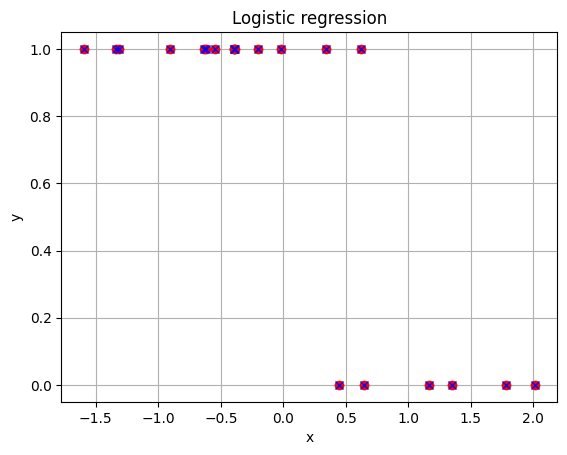

In [11]:
plt.plot(X_test[:,0],Y_test,'ro')
plt.plot(X_test[:,0],preds,'bx')
plt.title('Logistic regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on')